# Preparation

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_non_dummy = pd.read_excel("forms_cleaned.xlsx", sheet_name=0)
df_WhenG = pd.read_excel("forms_cleaned.xlsx", sheet_name=1)
df_ReasonUseG = pd.read_excel("forms_cleaned.xlsx", sheet_name=2)
df_ReasonNotUseG = pd.read_excel("forms_cleaned.xlsx", sheet_name=3)
df_FreqMenu = pd.read_excel("forms_cleaned.xlsx", sheet_name=4)
df_LikeG = pd.read_excel("forms_cleaned.xlsx", sheet_name=5)
df_DislikeG = pd.read_excel("forms_cleaned.xlsx", sheet_name=6)
df_ReasonEvsW = pd.read_excel("forms_cleaned.xlsx", sheet_name=7)
df_ReasonUseApp = pd.read_excel("forms_cleaned.xlsx", sheet_name=8)
df_ReasonNotUseApp = pd.read_excel("forms_cleaned.xlsx", sheet_name=9)
df_AppFeature = pd.read_excel("forms_cleaned.xlsx", sheet_name=10)
df_ImprsG = pd.read_excel("forms_cleaned.xlsx", sheet_name=11)

# df_non_dummy

In [3]:
df_non_dummy.head()

,Grade,Faculty,Sex,Living,2F3N,2N3F,2F3F,FreqG,AvePayG,PeopleG,FreqP,GvsP,WhereP,EvsW,App,RepositApp
0,B3,Com,M,Alone(Cook),0,0,0,0,500-799,2-3,0,PanShop,NxtClass,West,DontUse,Unanswered
1,B4,Com,M,Alone(NoCook),0,1,0,0,0,2-3,0,NoneOfThem,InGakushoku,NoneOfThem,Use,CreditCard(own)
2,B3,Com,M,WithParents,0,2,0,0,500-799,2-3,0,Gakushoku,InGakushoku,East,DontUse,Unanswered
3,B3,Com,M,Alone(Cook),0,1,0,2-3,300-499,2-3,1/W,Gakushoku,OtherClass,East,DontUse,Unanswered
4,B2,Soc,F,WithParents,0,2,1,1,300-499,2-3,2-3/W,PanShop,NxtClass,East,DontUse,Unanswered


In [4]:
df_non_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Grade       97 non-null     object
 1   Faculty     97 non-null     object
 2   Sex         97 non-null     object
 3   Living      97 non-null     object
 4   2F3N        97 non-null     int64 
 5   2N3F        97 non-null     int64 
 6   2F3F        97 non-null     int64 
 7   FreqG       97 non-null     object
 8   AvePayG     97 non-null     object
 9   PeopleG     97 non-null     object
 10  FreqP       97 non-null     object
 11  GvsP        97 non-null     object
 12  WhereP      97 non-null     object
 13  EvsW        97 non-null     object
 14  App         97 non-null     object
 15  RepositApp  97 non-null     object
dtypes: int64(3), object(13)
memory usage: 12.3+ KB


In [5]:
def plot_cumulative_bar(df: DataFrame, 
                        x: str, 
                        hue: str, 
                        x_order: list, 
                        hue_order: list, 
                        c: list, 
                        type: str = "vertical", 
                        save: bool = True):
    n_hue = len(hue_order)
    n_x = len(x_order)
    count_x = np.array(df.groupby(x).size().reindex(x_order))
    result = [[0] * n_x for _ in range(n_hue)]
    color = c

    for i in range(n_hue):
        for j in range(n_x):
            result[i][j] = df[(df[x] == x_order[j]) & (df[hue] == hue_order[i])].shape[0]

    fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
    bottom = np.zeros(n_x)

    if type == "horizontal":
        for i in range(n_hue):
            b = ax.barh(x_order, result[i], left=bottom, label=hue_order[i], color=color[i])
            percentage = list(np.array(result[i]) / count_x * 100)
            percentage = list(map(lambda x: f"{x:.1f}%" if x != 0 else "", percentage))
            ax.bar_label(b, labels=percentage, label_type="center", fontsize=10)
            bottom += result[i]
        ax.set_xlabel("Count")
        ax.set_ylabel(x)
        
    elif type == "vertical":
        for i in range(n_hue):
            b = ax.bar(x_order, result[i], bottom=bottom, label=hue_order[i], color=color[i])
            percentage = list(np.array(result[i]) / count_x * 100)
            percentage = list(map(lambda x: f"{x:.1f}%" if x != 0 else "", percentage))
            ax.bar_label(b, labels=percentage, label_type="center", fontsize=10)
            bottom += result[i]
        ax.set_xlabel(x)
        ax.set_ylabel("Count")
    
    ax.set_title(f"Cumulative bar plot of {x} by {hue}")
    ax.legend(title=hue)
    ax.grid()

    if save:
        fig.savefig(f"images/{x}By{hue}.png")
    return fig, ax

In [44]:
color4 = ["lightgreen", "skyblue", "plum", "lightcoral"]
color6 = ["bisque", "lightgreen", "turquoise", "skyblue", "plum", "lightcoral"]

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of Grade by FreqG'}, xlabel='Grade', ylabel='Count'>)

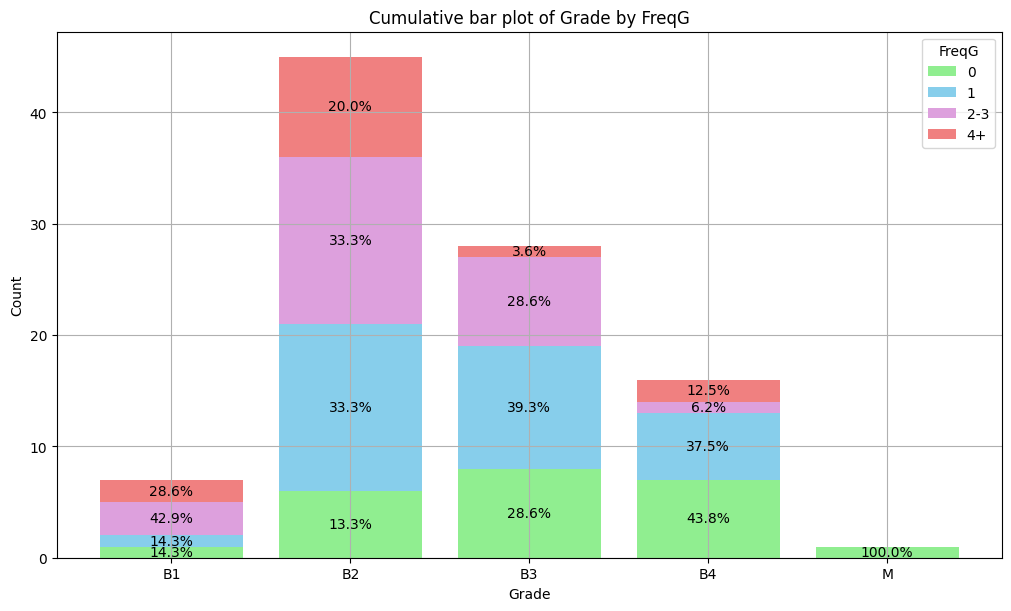

In [7]:
plot_cumulative_bar(df_non_dummy, "Grade", "FreqG", 
                    ["B1", "B2", "B3", "B4", "M"], ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of Faculty by FreqG'}, xlabel='Faculty', ylabel='Count'>)

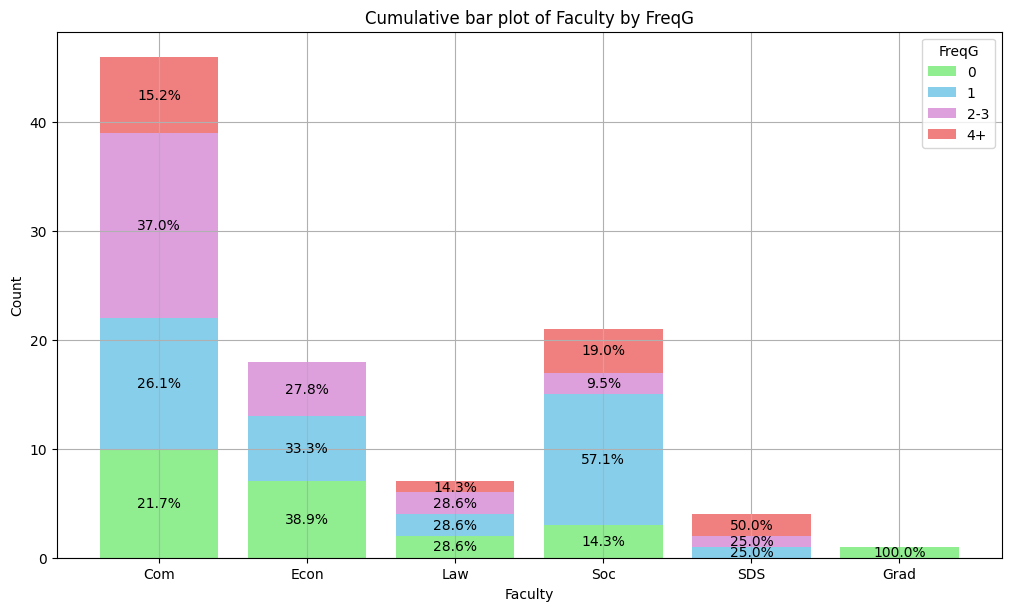

In [8]:
plot_cumulative_bar(df_non_dummy, "Faculty", "FreqG", 
                    ["Com", "Econ", "Law", "Soc", "SDS", "Grad"], 
                    ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of Sex by FreqG'}, xlabel='Sex', ylabel='Count'>)

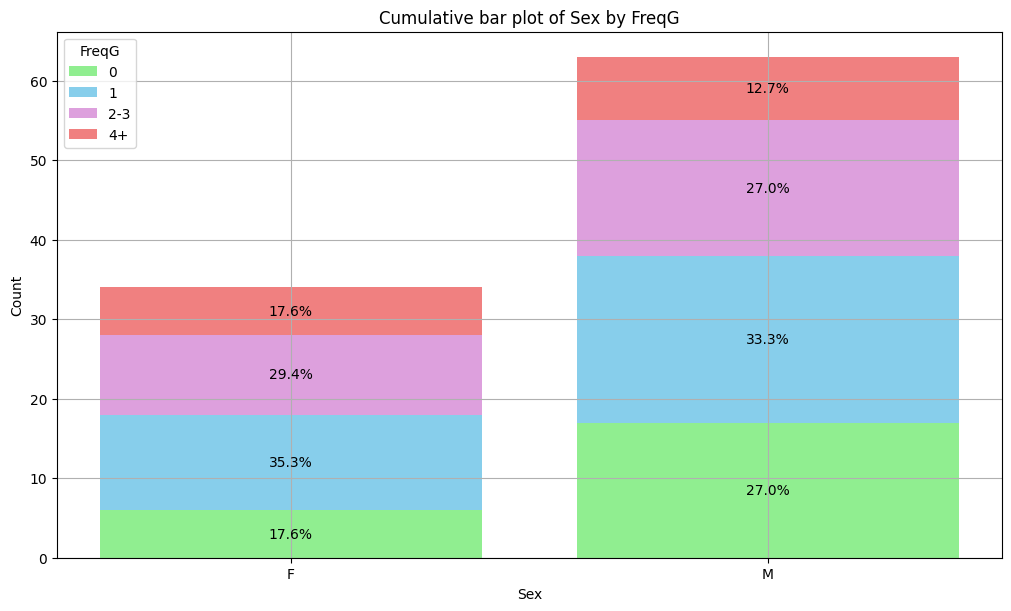

In [9]:
plot_cumulative_bar(df_non_dummy, "Sex", "FreqG", ["F", "M"], ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of Living by FreqG'}, xlabel='Living', ylabel='Count'>)

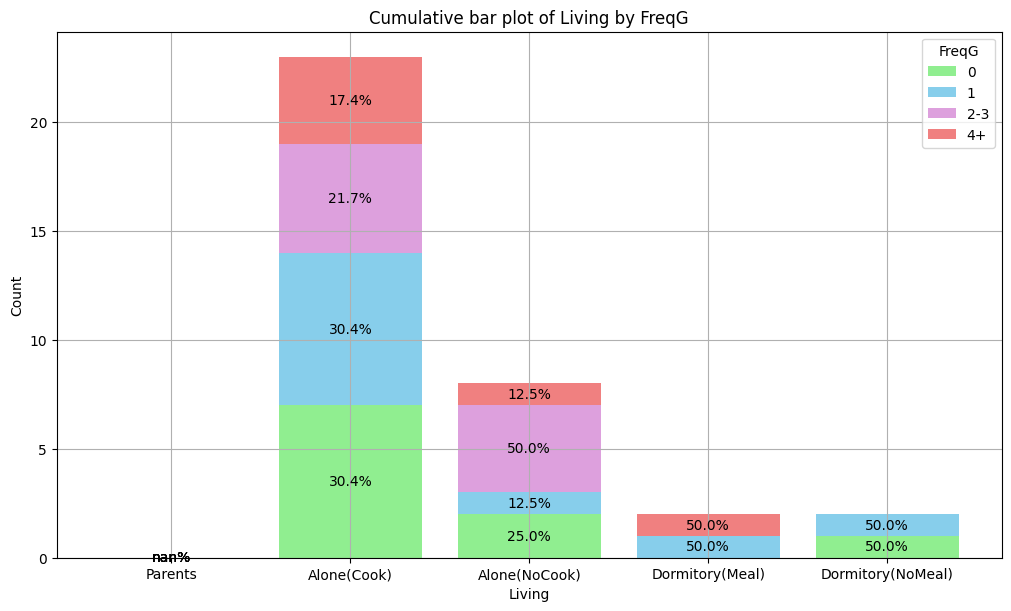

In [10]:
plot_cumulative_bar(df_non_dummy, "Living", "FreqG", 
                    ['Parents', 'Alone(Cook)', 'Alone(NoCook)', 'Dormitory(Meal)', 'Dormitory(NoMeal)'], 
                    ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of AvePayG by FreqG'}, xlabel='AvePayG', ylabel='Count'>)

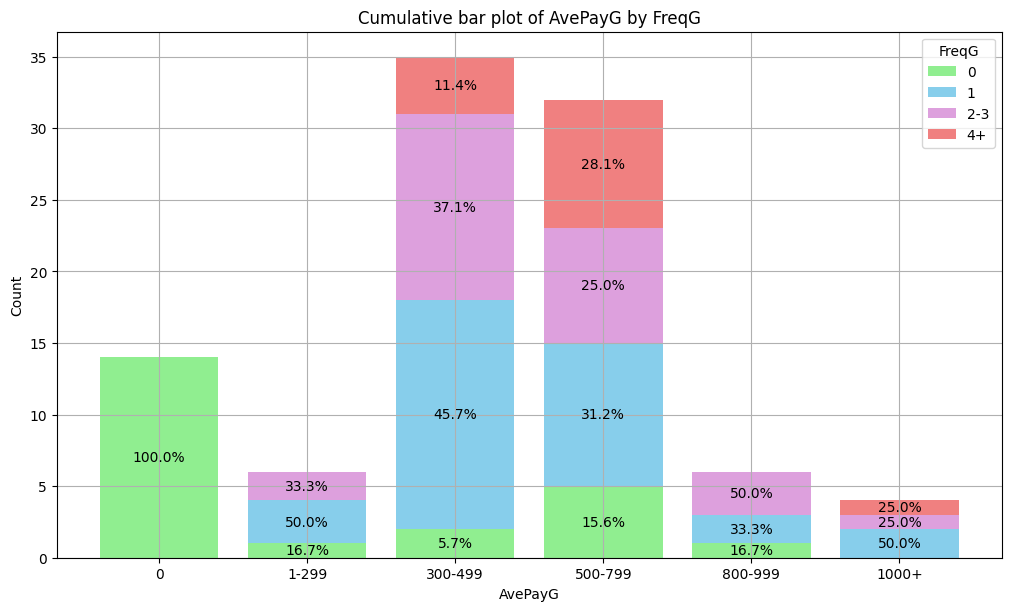

In [11]:
plot_cumulative_bar(df_non_dummy, "AvePayG", "FreqG", 
                    ['0', '1-299', '300-499', '500-799', '800-999', '1000+'], 
                    ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of PeopleG by FreqG'}, xlabel='PeopleG', ylabel='Count'>)

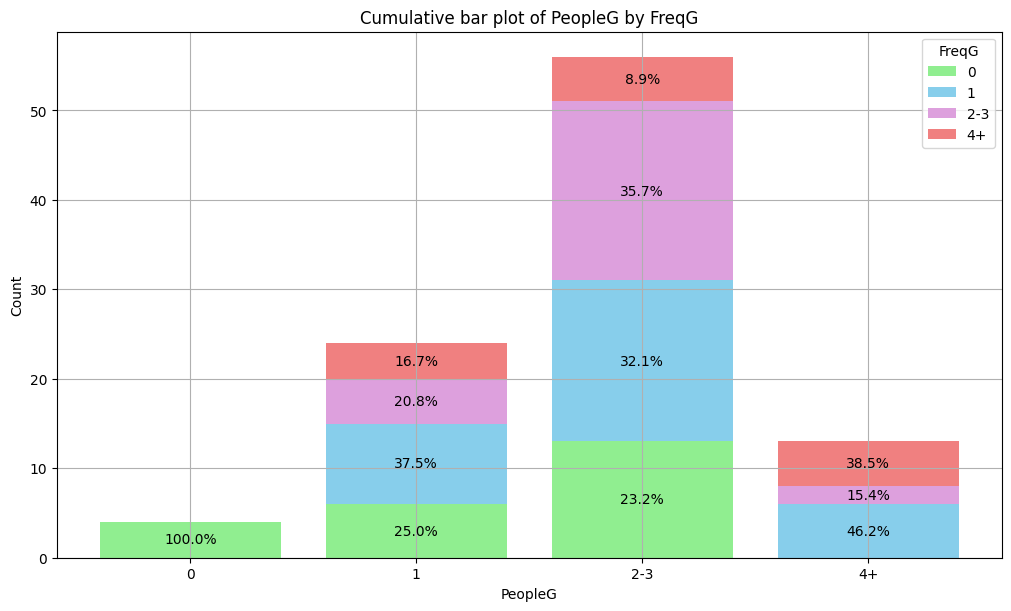

In [12]:
plot_cumulative_bar(df_non_dummy, "PeopleG", "FreqG", 
                    ['0', '1', '2-3', '4+'], ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of FreqG by FreqP'}, xlabel='FreqG', ylabel='Count'>)

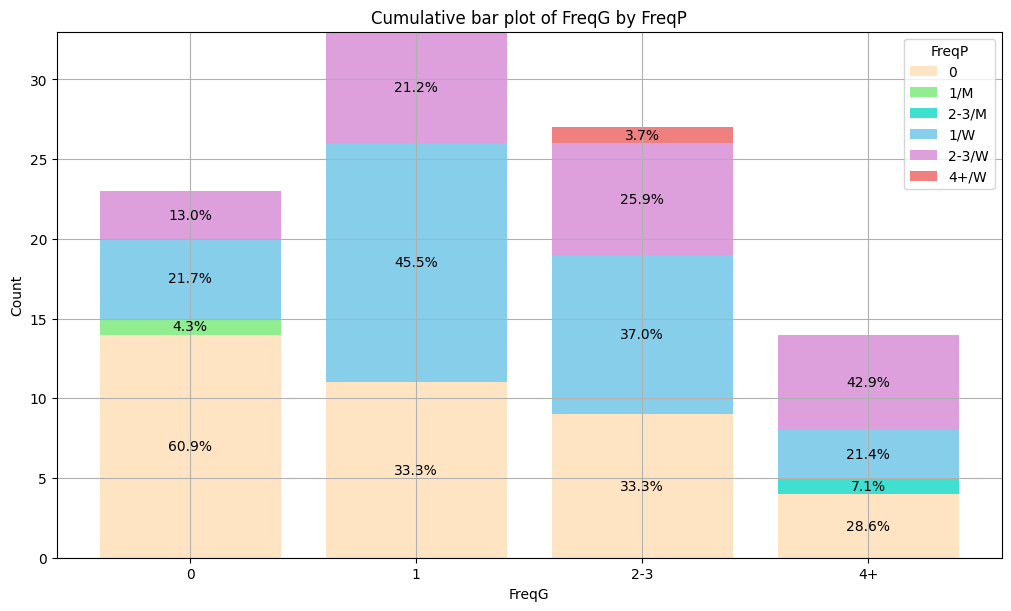

In [13]:
plot_cumulative_bar(df_non_dummy, "FreqG", "FreqP", 
                    ["0", "1", "2-3", "4+"], 
                    ['0', '1/M', '2-3/M', '1/W', '2-3/W', '4+/W'], color6)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of GvsP by FreqG'}, xlabel='GvsP', ylabel='Count'>)

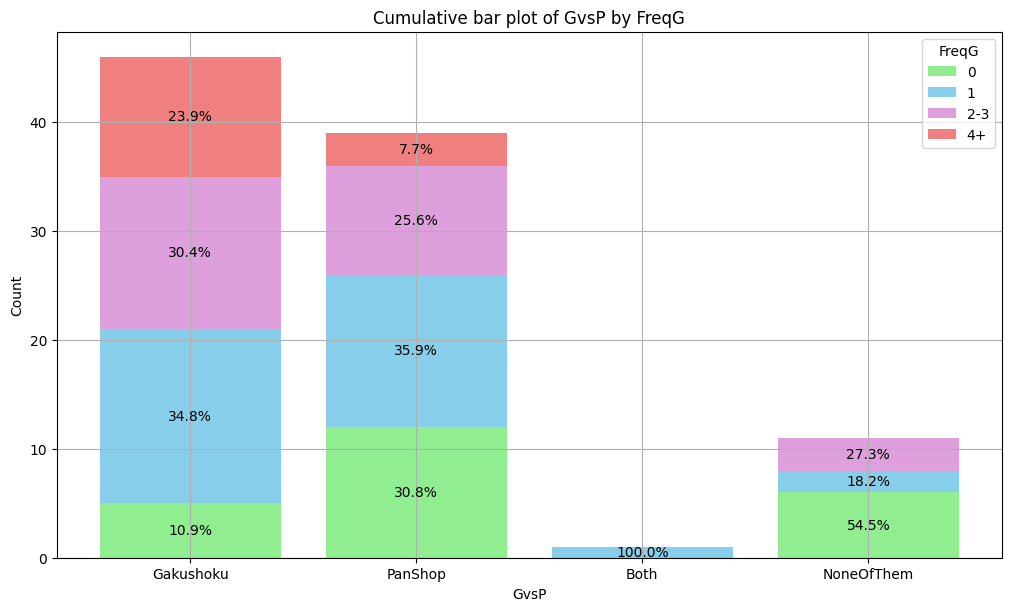

In [14]:
plot_cumulative_bar(df_non_dummy, "GvsP", "FreqG", 
                    ['Gakushoku', 'PanShop', 'Both', 'NoneOfThem'], 
                    ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of GvsP by FreqP'}, xlabel='GvsP', ylabel='Count'>)

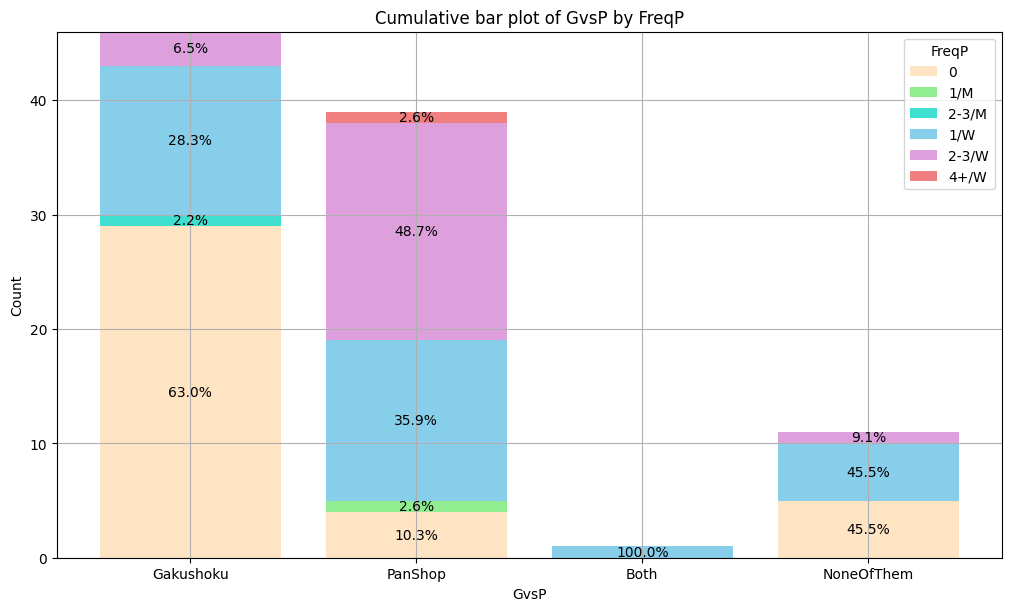

In [15]:
plot_cumulative_bar(df_non_dummy, "GvsP", "FreqP", 
                    ['Gakushoku', 'PanShop', 'Both', 'NoneOfThem'], 
                    ['0', '1/M', '2-3/M', '1/W', '2-3/W', '4+/W'], color6)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of WhereP by FreqP'}, xlabel='WhereP', ylabel='Count'>)

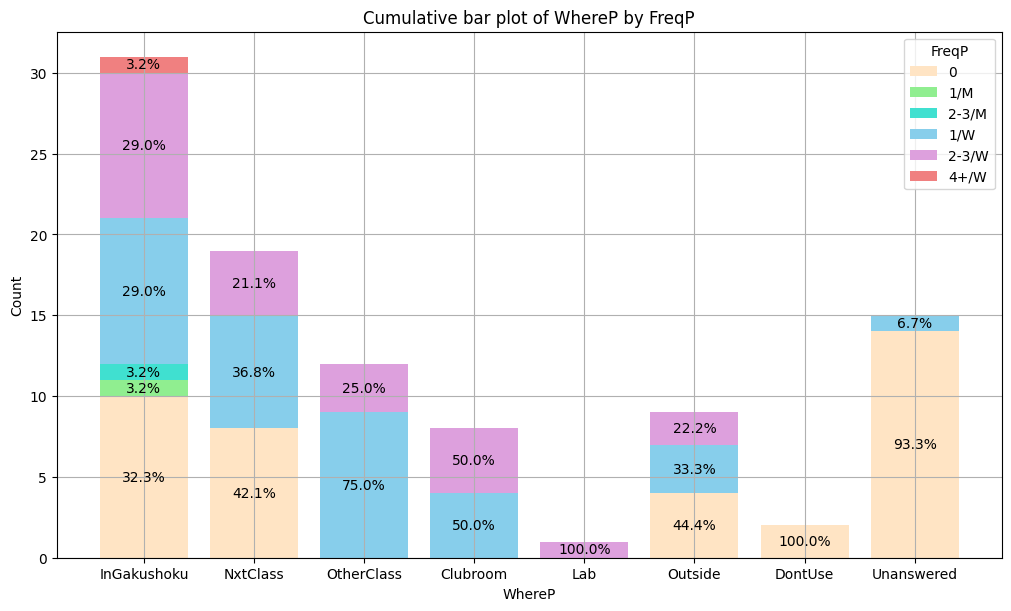

In [16]:
plot_cumulative_bar(df_non_dummy, "WhereP", "FreqP", 
                    ['InGakushoku', 'NxtClass', 'OtherClass', 'Clubroom', 
                     'Lab', 'Outside', 'DontUse','Unanswered'], 
                    ['0', '1/M', '2-3/M', '1/W', '2-3/W', '4+/W'], color6)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of EvsW by FreqG'}, xlabel='EvsW', ylabel='Count'>)

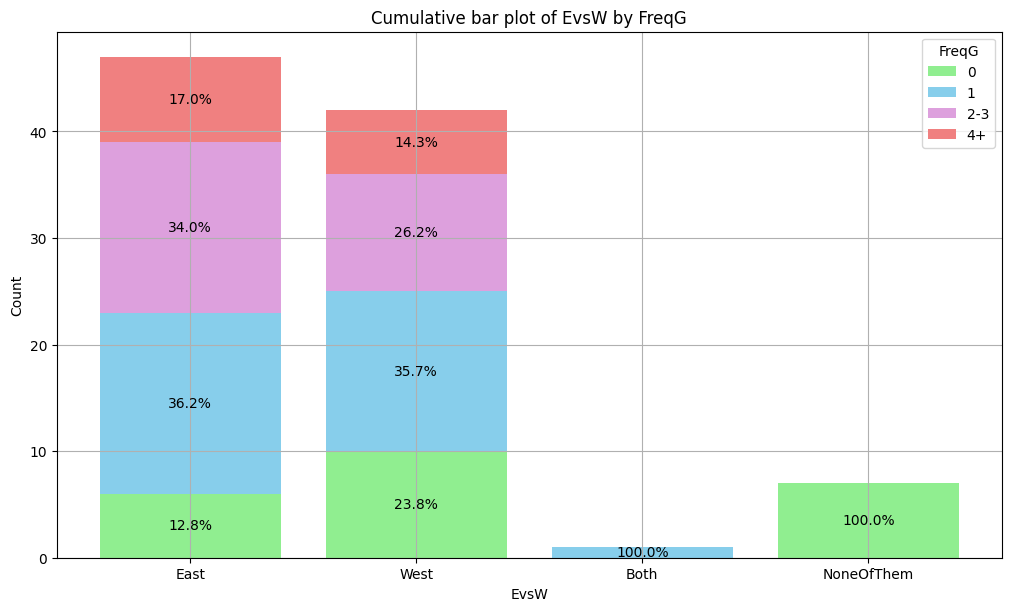

In [17]:
plot_cumulative_bar(df_non_dummy, "EvsW", "FreqG", 
                    ['East', 'West', 'Both', 'NoneOfThem'], 
                    ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of EvsW by FreqP'}, xlabel='EvsW', ylabel='Count'>)

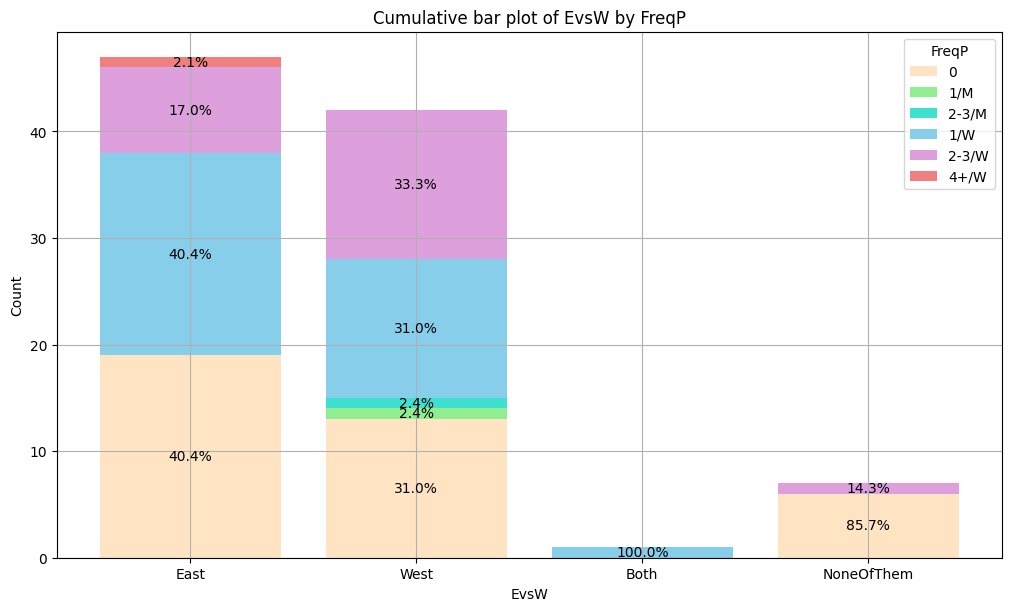

In [18]:
plot_cumulative_bar(df_non_dummy, "EvsW", "FreqP", 
                    ['East', 'West', 'Both', 'NoneOfThem'], 
                    ['0', '1/M', '2-3/M', '1/W', '2-3/W', '4+/W'], color6)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of App by FreqG'}, xlabel='App', ylabel='Count'>)

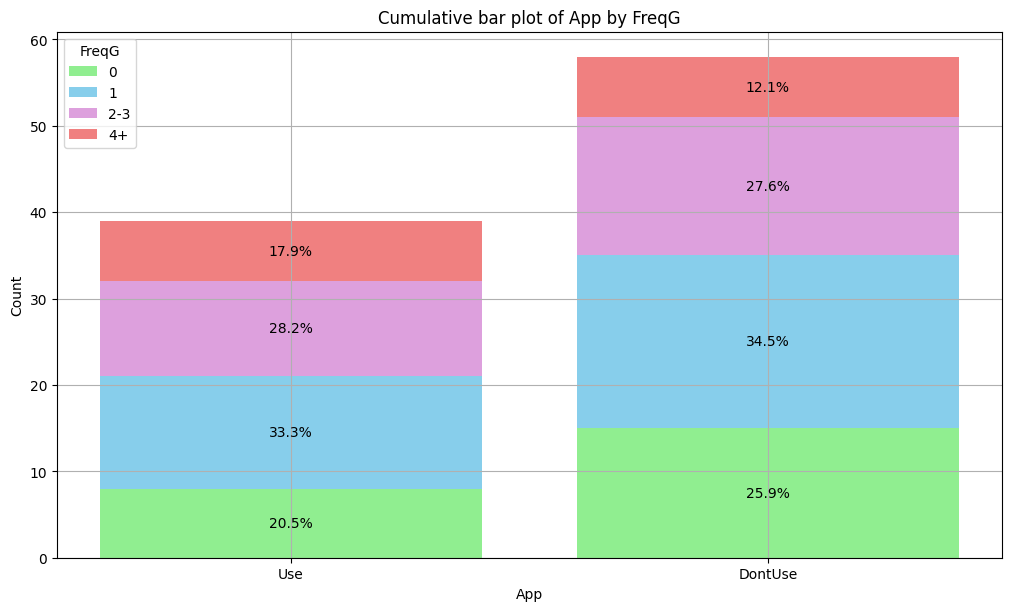

In [19]:
plot_cumulative_bar(df_non_dummy, "App", "FreqG", 
                    ['Use', 'DontUse'], ["0", "1", "2-3", "4+"], color4)

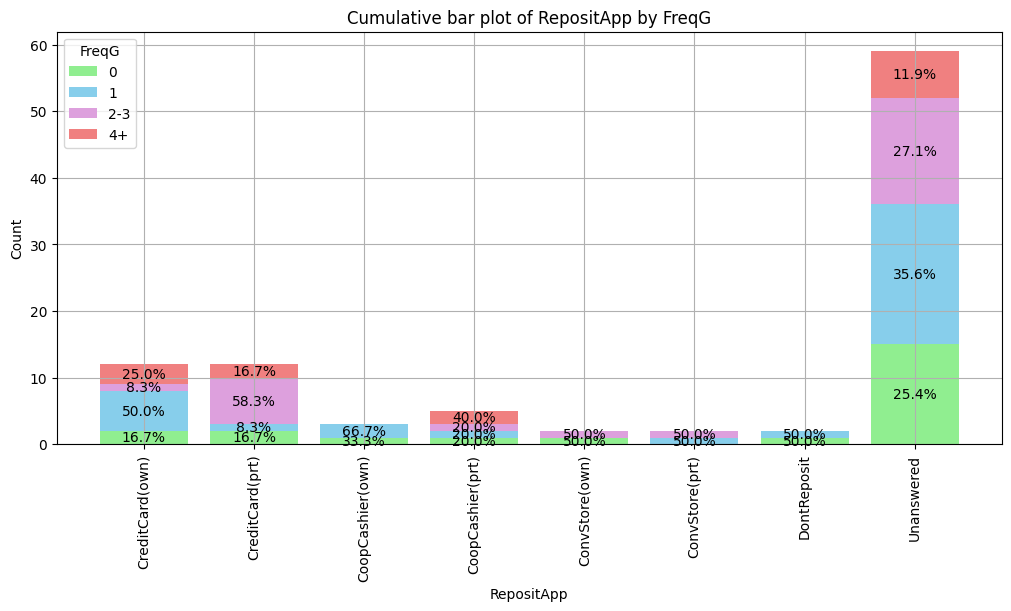

In [20]:
fig, ax = plot_cumulative_bar(df_non_dummy, "RepositApp", "FreqG", 
                              ['CreditCard(own)', 'CreditCard(prt)', 'CoopCashier(own)', 'CoopCashier(prt)', 
                               'ConvStore(own)', 'ConvStore(prt)', 'DontReposit', 'Unanswered'], 
                               ["0", "1", "2-3", "4+"], color4, save=False)
ax.tick_params(axis="x", rotation=90)
fig.savefig("images/RepositAppByFreqG1.png")

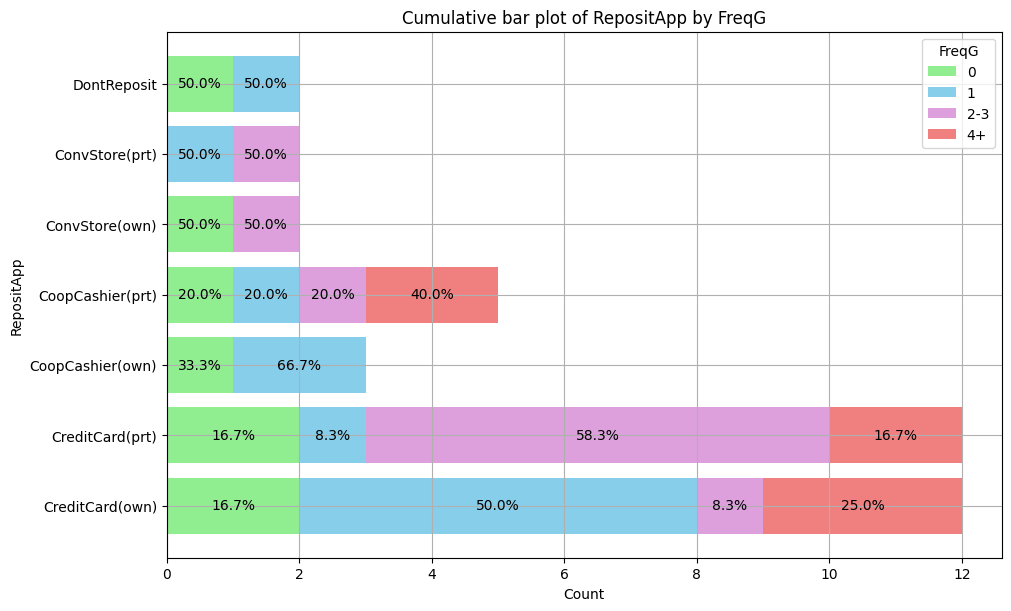

In [21]:
fig, ax = plot_cumulative_bar(df_non_dummy, "RepositApp", "FreqG", 
                              ['CreditCard(own)', 'CreditCard(prt)', 'CoopCashier(own)', 'CoopCashier(prt)', 
                               'ConvStore(own)', 'ConvStore(prt)', 'DontReposit'], 
                               ["0", "1", "2-3", "4+"], color4, type="horizontal", save=False)
fig.savefig("images/RepositAppByFreqG2.png")

# Others

In [22]:
def plot_cumulative_bar_dummy(df_x: DataFrame, 
                              df_hue: DataFrame,
                              x: str, 
                              hue: str, 
                              x_order: list, 
                              hue_order: list, 
                              c: list, 
                              type: str = "horizontal", 
                              save: bool = True):
    
    n_hue = len(hue_order)
    n_x = len(x_order)

    count_x = np.array(df_x.sum().reindex(x_order))
    # zero divideによるエラーを防ぐため、countが0の場合は1にしている
    count_x = np.array([count_x[i] if count_x[i] != 0 else 1 for i in range(len(count_x))])

    result = [[0] * n_x for _ in range(n_hue)]
    color = c
    df_mixed = pd.concat([df_x, df_hue], axis=1)

    for i in range(n_hue):
        for j in range(n_x):
            result[i][j] = df_mixed[(df_mixed[x_order[j]] == 1) & (df_mixed[hue] == hue_order[i])].shape[0]

    fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
    bottom = np.zeros(n_x)

    if type == "horizontal":
        for i in range(n_hue):
            b = ax.barh(x_order, result[i], left=bottom, label=hue_order[i], color=color[i])
            percentage = list(np.array(result[i]) / count_x * 100)
            percentage = list(map(lambda x: f"{x:.0f}%" if x != 0 and x != 100 else "", percentage))
            ax.bar_label(b, labels=percentage, label_type="center", fontsize=10)
            bottom += result[i]
        ax.set_xlabel("Count")
        ax.set_ylabel(x)
        
    elif type == "vertical":
        for i in range(n_hue):
            b = ax.bar(x_order, result[i], bottom=bottom, label=hue_order[i], color=color[i])
            percentage = list(np.array(result[i]) / count_x * 100)
            percentage = list(map(lambda x: f"{x:.0f}%" if x != 0 and x != 100 else "", percentage))
            ax.bar_label(b, labels=percentage, label_type="center", fontsize=10)
            bottom += result[i]
        ax.set_xlabel(x)
        ax.set_ylabel("Count")
    
    ax.set_title(f"Cumulative bar plot of {x} by {hue}")
    ax.legend(title=hue)
    ax.grid()

    if save:
        fig.savefig(f"images/{x}By{hue}.png")
    return fig, ax

In [23]:
df_FreqG = df_non_dummy[["FreqG"]]
df_FreqP = df_non_dummy[["FreqP"]]
color4 = ["lightgreen", "skyblue", "plum", "lightcoral"]
color6 = ["bisque", "lightgreen", "turquoise", "skyblue", "plum", "lightcoral"]

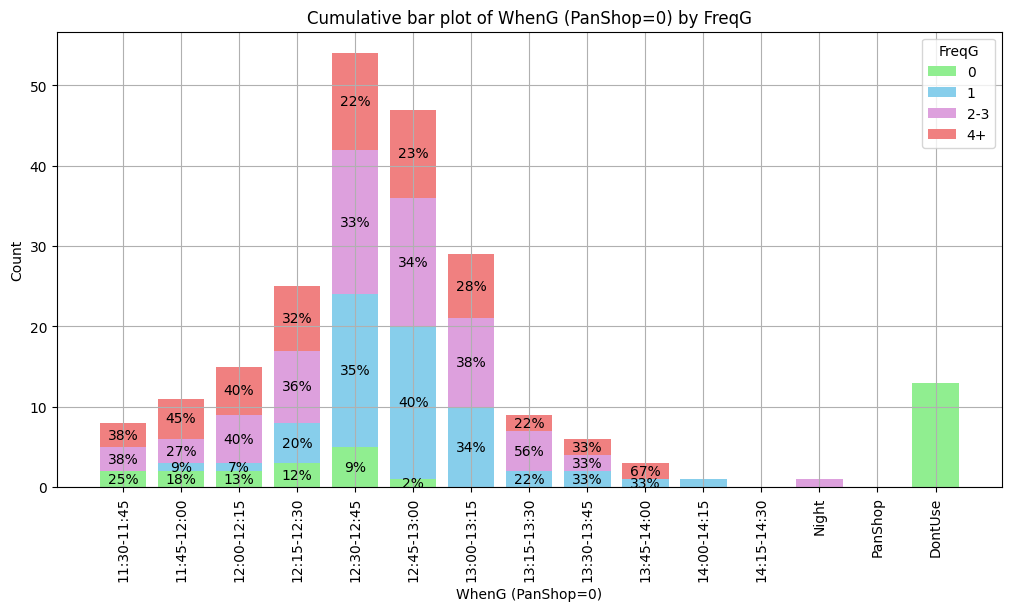

In [24]:
fig, ax = plot_cumulative_bar_dummy(df_WhenG[df_WhenG["PanShop"] == 0], df_FreqG, "WhenG (PanShop=0)", "FreqG", 
                                    ['11:30-11:45', '11:45-12:00', '12:00-12:15', '12:15-12:30',
                                     '12:30-12:45', '12:45-13:00', '13:00-13:15', '13:15-13:30',
                                     '13:30-13:45', '13:45-14:00', '14:00-14:15', '14:15-14:30', 'Night',
                                     'PanShop', 'DontUse'], 
                                    ["0", "1", "2-3", "4+"], color4, type="vertical", save=False)
ax.tick_params(axis="x", rotation=90)
fig.savefig("images/WhenGByFreqG.png")

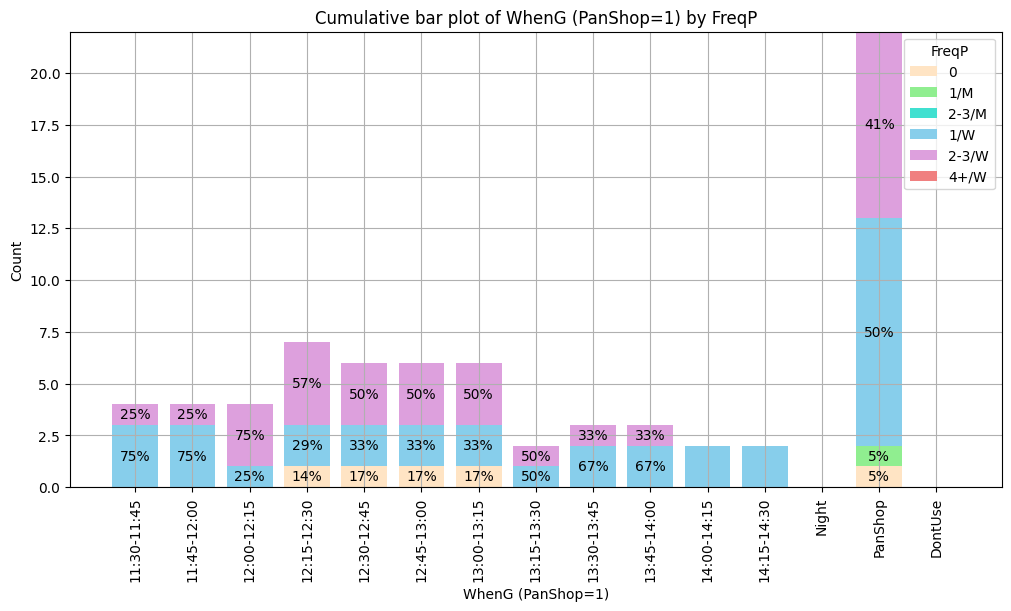

In [25]:
fig, ax = plot_cumulative_bar_dummy(df_WhenG[df_WhenG["PanShop"] == 1], df_FreqP, 
                                    "WhenG (PanShop=1)", "FreqP", 
                                    ['11:30-11:45', '11:45-12:00', '12:00-12:15', '12:15-12:30',
                                     '12:30-12:45', '12:45-13:00', '13:00-13:15', '13:15-13:30',
                                     '13:30-13:45', '13:45-14:00', '14:00-14:15', '14:15-14:30', 'Night',
                                     'PanShop', 'DontUse'], 
                                    ['0', '1/M', '2-3/M', '1/W', '2-3/W', '4+/W'], 
                                    color6, type="vertical", save=False)
ax.tick_params(axis="x", rotation=90)
fig.savefig("images/WhenGByFreqP.png")

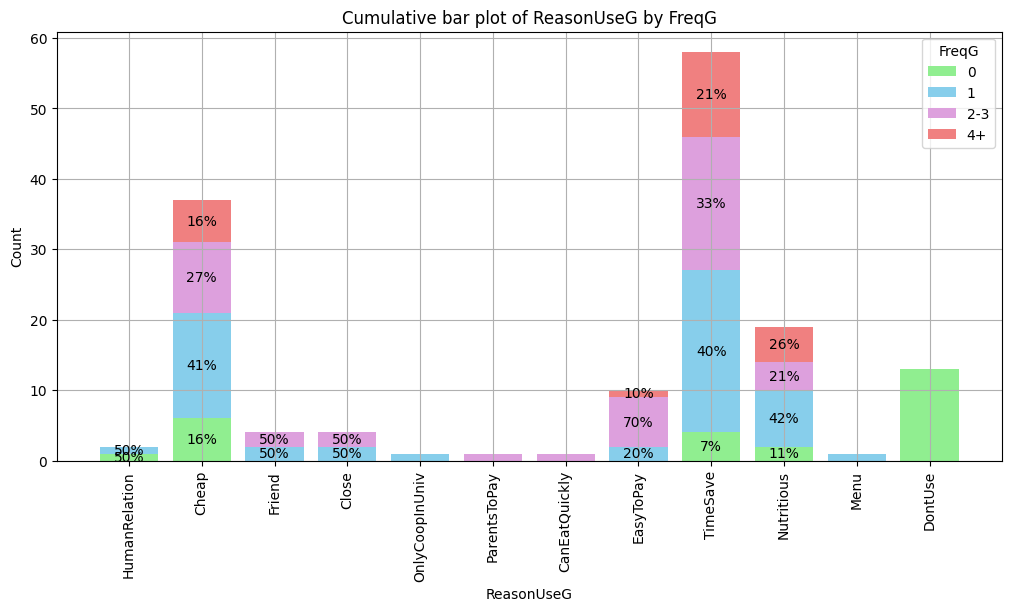

In [26]:
fig, ax = plot_cumulative_bar_dummy(df_ReasonUseG, df_FreqG, "ReasonUseG", "FreqG", 
                                    ['HumanRelation', 'Cheap', 'Friend', 'Close', 'OnlyCoopInUniv', 
                                     'ParentsToPay', 'CanEatQuickly', 'EasyToPay', 'TimeSave', 
                                     'Nutritious', 'Menu', 'DontUse'], 
                                    ["0", "1", "2-3", "4+"], color4, type="vertical", save=False)
ax.tick_params(axis="x", rotation=90)
fig.savefig("images/ReasonUseGByFreqG.png")

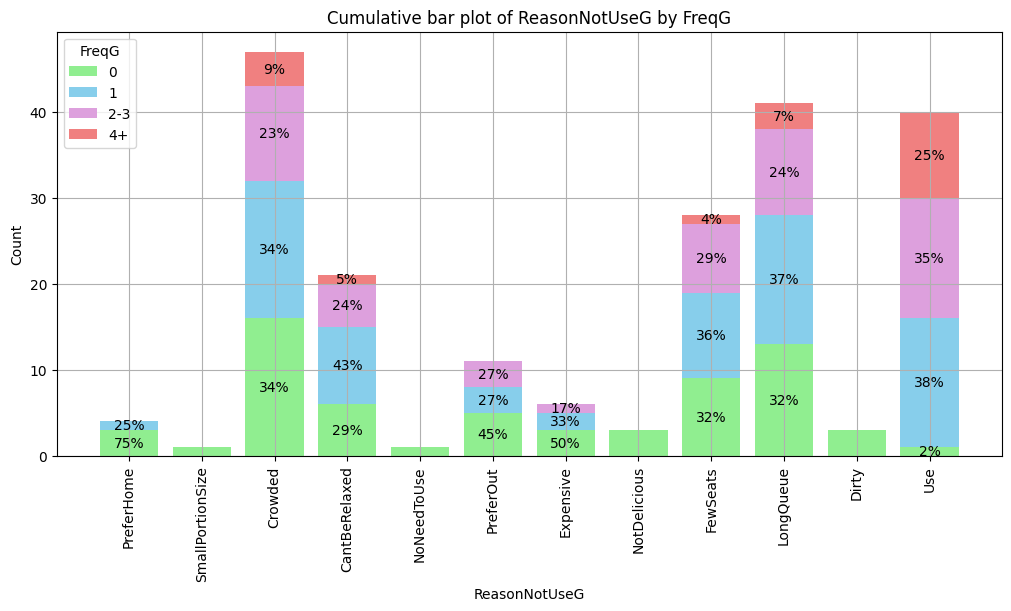

In [27]:
fig, ax = plot_cumulative_bar_dummy(df_ReasonNotUseG, df_FreqG, "ReasonNotUseG", "FreqG", 
                                    ['PreferHome', 'SmallPortionSize', 'Crowded', 'CantBeRelaxed', 
                                     'NoNeedToUse', 'PreferOut', 'Expensive', 'NotDelicious', 
                                     'FewSeats', 'LongQueue', 'Dirty', 'Use'], 
                                    ["0", "1", "2-3", "4+"], color4, type="vertical", save=False)
ax.tick_params(axis="x", rotation=90)
fig.savefig("images/ReasonNotUseGByFreqG.png")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of FreqMenu by FreqG'}, xlabel='Count', ylabel='FreqMenu'>)

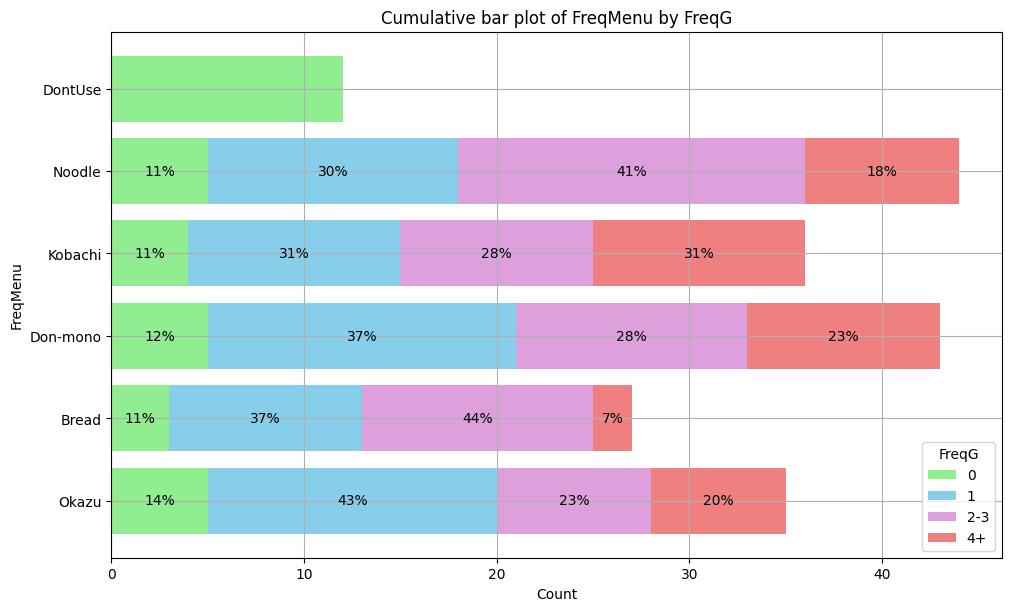

In [28]:
plot_cumulative_bar_dummy(df_FreqMenu, df_FreqG, "FreqMenu", "FreqG", 
                          ['Okazu', 'Bread', 'Don-mono', 'Kobachi', 'Noodle', 'DontUse'], 
                          ["0", "1", "2-3", "4+"], color4)

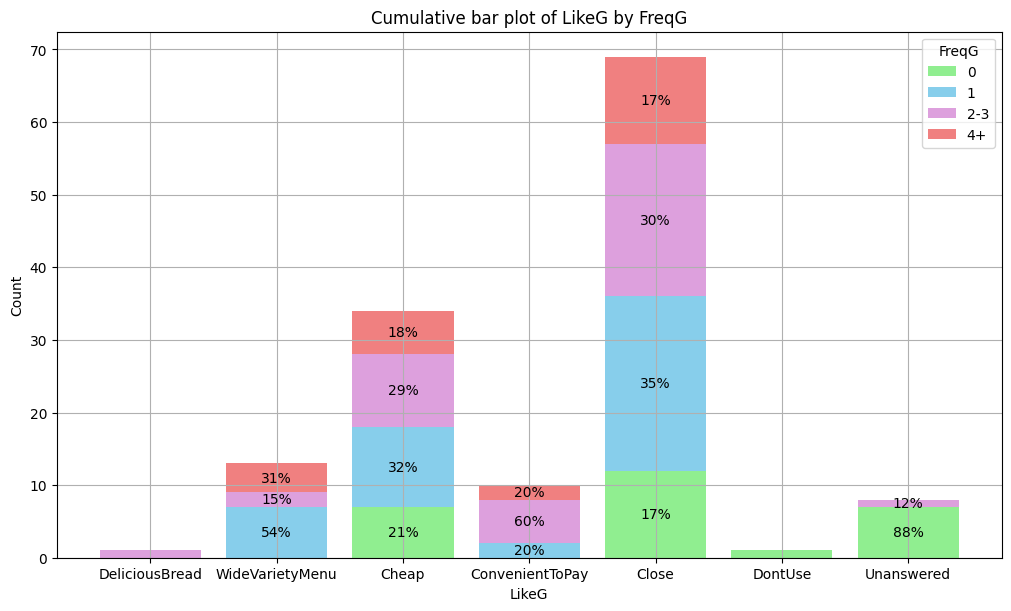

In [29]:
fig, ax = plot_cumulative_bar_dummy(df_LikeG, df_FreqG, "LikeG", "FreqG", 
                                    ['DeliciousBread', 'WideVarietyMenu', 'Cheap', 'ConvenientToPay',
                                     'Close', 'DontUse', 'Unanswered'], 
                                    ["0", "1", "2-3", "4+"], color4, type="vertical")

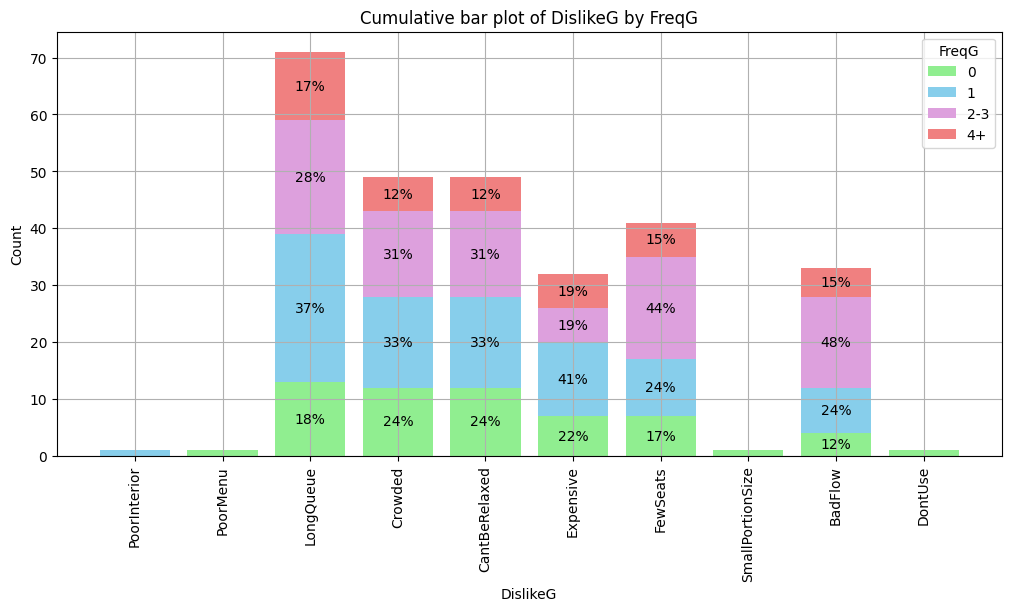

In [30]:
fig, ax = plot_cumulative_bar_dummy(df_DislikeG, df_FreqG, "DislikeG", "FreqG", 
                                    ['PoorInterior', 'PoorMenu', 'LongQueue', 'Crowded', 'CantBeRelaxed', 
                                     'Expensive', 'FewSeats', 'SmallPortionSize', 'BadFlow', 'DontUse'], 
                                    ["0", "1", "2-3", "4+"], color4, type="vertical", save=False)
ax.tick_params(axis="x", rotation=90)
fig.savefig("images/DislikeGByFreqG.png")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of ReasonEvsW by EvsW'}, xlabel='Count', ylabel='ReasonEvsW'>)

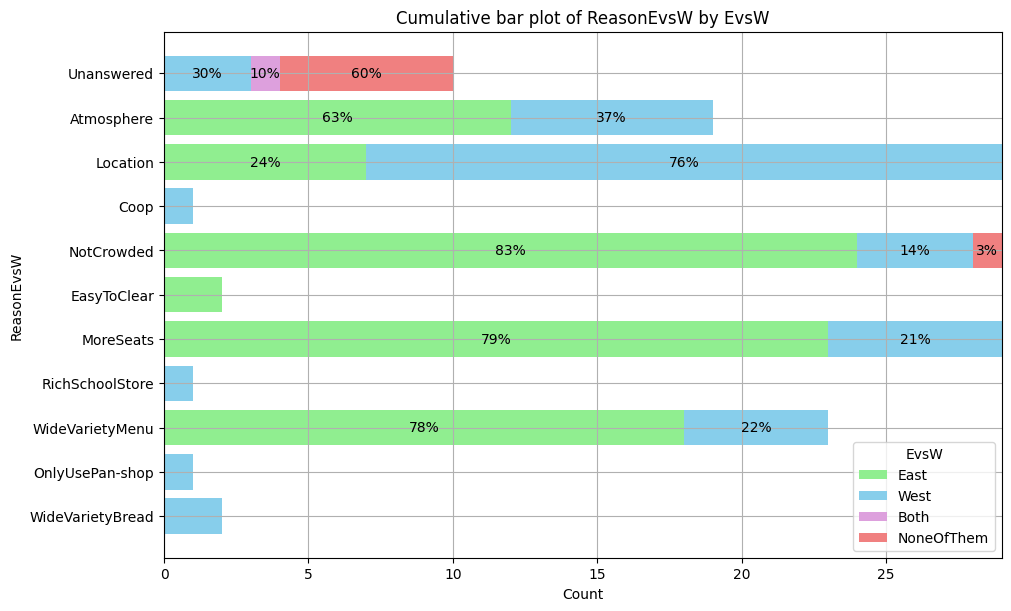

In [31]:
plot_cumulative_bar_dummy(df_ReasonEvsW, df_non_dummy[["EvsW"]], "ReasonEvsW", "EvsW", 
                          ['WideVarietyBread', 'OnlyUsePan-shop', 'WideVarietyMenu', 
                           'RichSchoolStore', 'MoreSeats', 'EasyToClear', 'NotCrowded', 
                           'Coop', 'Location', 'Atmosphere', 'Unanswered'], 
                          ['East', 'West', 'Both', 'NoneOfThem'], 
                          color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of ReasonEvsW by FreqG'}, xlabel='Count', ylabel='ReasonEvsW'>)

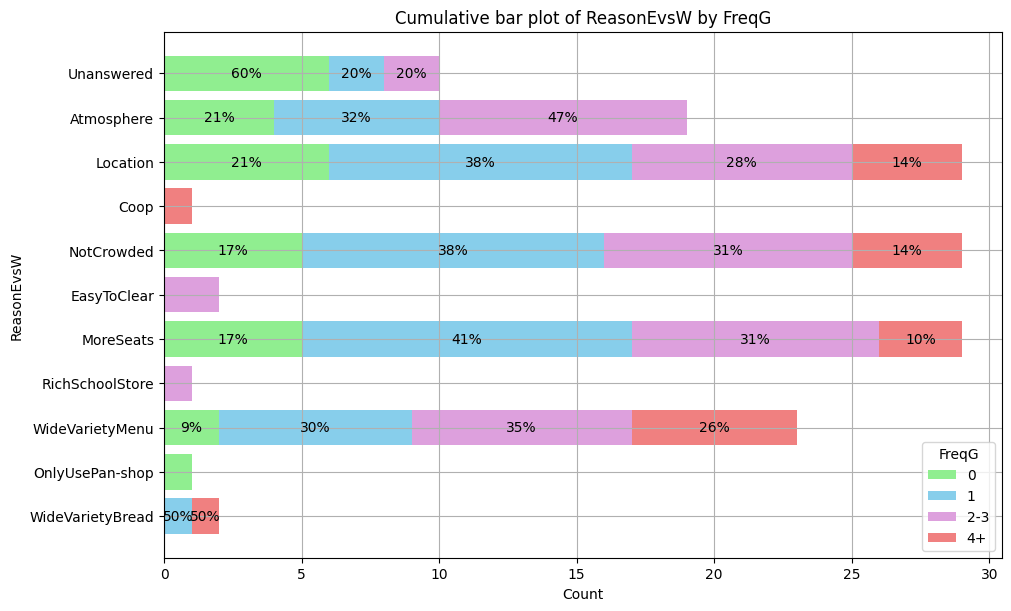

In [32]:
plot_cumulative_bar_dummy(df_ReasonEvsW, df_FreqG, "ReasonEvsW", "FreqG", 
                          ['WideVarietyBread', 'OnlyUsePan-shop', 'WideVarietyMenu', 
                           'RichSchoolStore', 'MoreSeats', 'EasyToClear', 'NotCrowded', 
                           'Coop', 'Location', 'Atmosphere', 'Unanswered'], 
                          ["0", "1", "2-3", "4+"], 
                          color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of ReasonUseApp by FreqG'}, xlabel='ReasonUseApp', ylabel='Count'>)

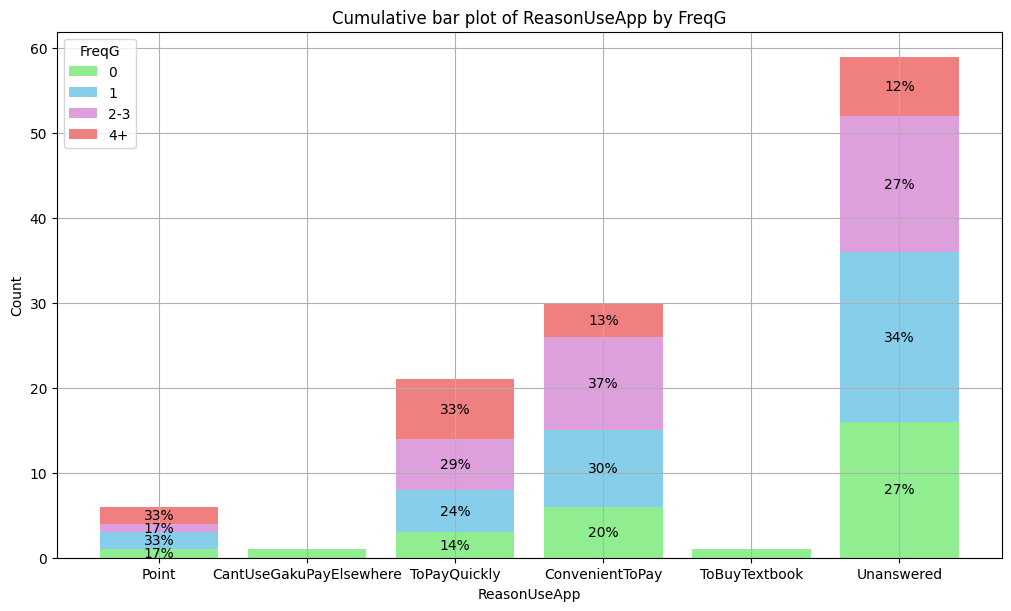

In [33]:
plot_cumulative_bar_dummy(df_ReasonUseApp, df_FreqG, "ReasonUseApp", "FreqG", 
                          ['Point', 'CantUseGakuPayElsewhere', 'ToPayQuickly', 
                           'ConvenientToPay', 'ToBuyTextbook', 'Unanswered'], 
                          ["0", "1", "2-3", "4+"], color4, type="vertical")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of ReasonNotUseApp by FreqG'}, xlabel='Count', ylabel='ReasonNotUseApp'>)

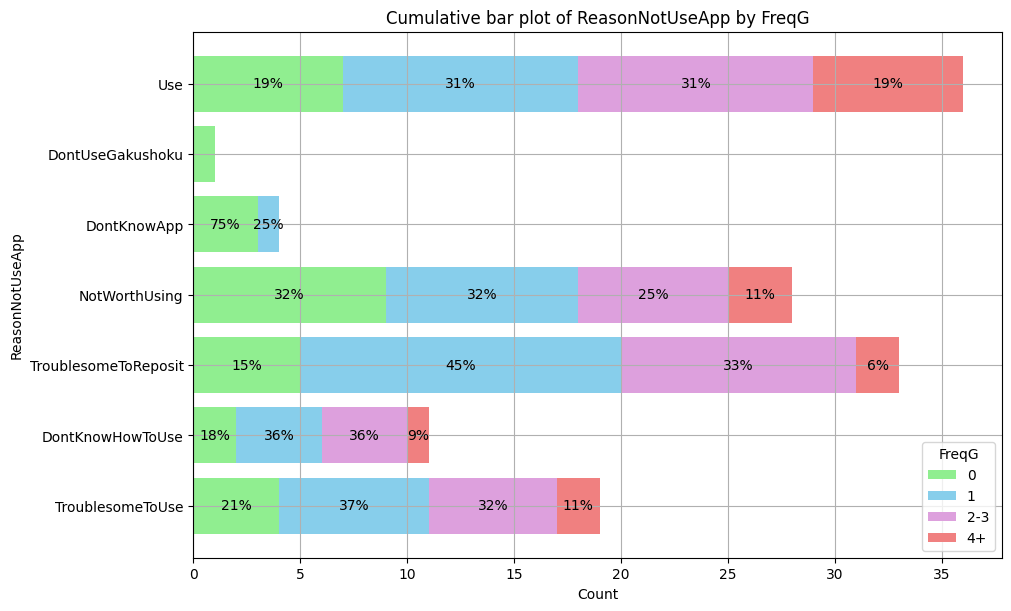

In [34]:
plot_cumulative_bar_dummy(df_ReasonNotUseApp, df_FreqG, "ReasonNotUseApp", "FreqG", 
                          ['TroublesomeToUse', 'DontKnowHowToUse', 'TroublesomeToReposit',
                           'NotWorthUsing', 'DontKnowApp', 'DontUseGakushoku', 'Use'], 
                           ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of AppFeature by FreqG'}, xlabel='Count', ylabel='AppFeature'>)

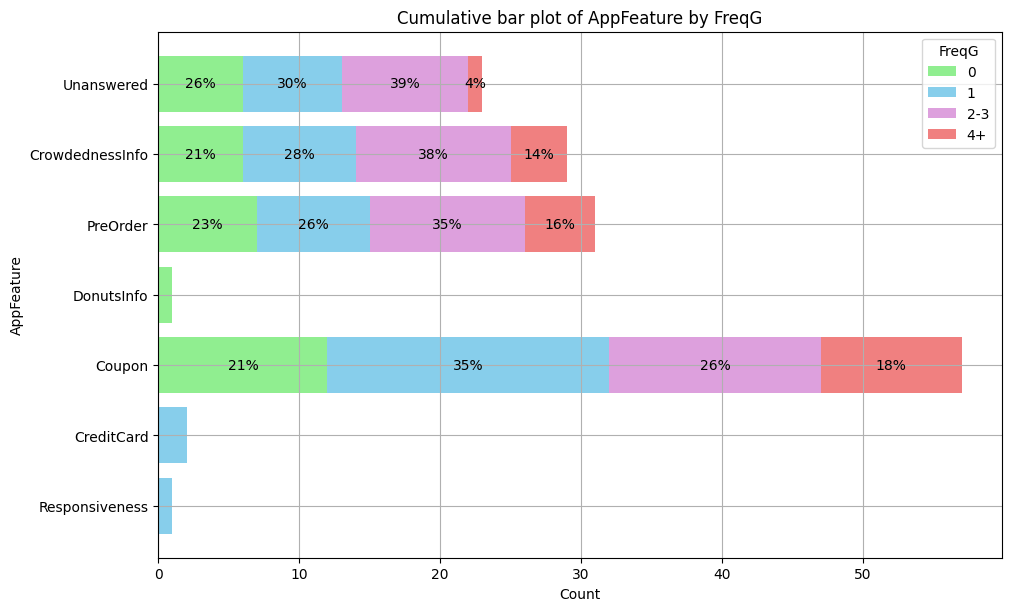

In [35]:
plot_cumulative_bar_dummy(df_AppFeature, df_FreqG, "AppFeature", "FreqG", 
                          ['Responsiveness', 'CreditCard', 'Coupon', 'DonutsInfo', 
                           'PreOrder', 'CrowdednessInfo', 'Unanswered'], 
                           ["0", "1", "2-3", "4+"], color4)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of AppFeature by App'}, xlabel='Count', ylabel='AppFeature'>)

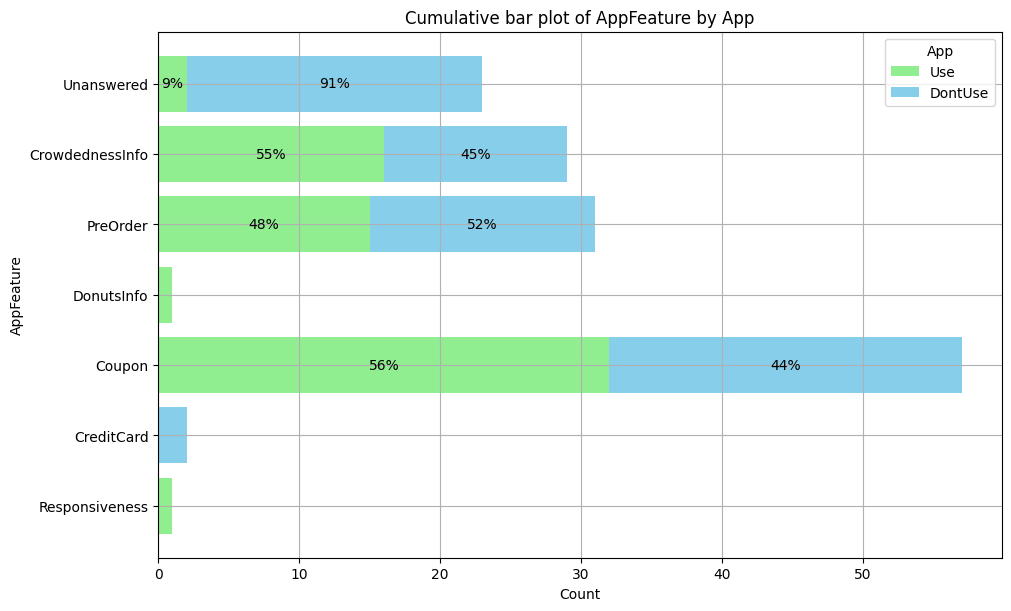

In [36]:
plot_cumulative_bar_dummy(df_AppFeature, df_non_dummy[["App"]], "AppFeature", "App", 
                          ['Responsiveness', 'CreditCard', 'Coupon', 'DonutsInfo', 
                           'PreOrder', 'CrowdednessInfo', 'Unanswered'], 
                           ["Use", "DontUse"], ["lightgreen", "skyblue"])

# df_ImprsG

In [53]:
df_ImprsG_labeled = pd.read_csv("forms_imprsg_labeled.csv")
df_ImprsG_labeled.head()

,Positive,Neutral,Negative,Fresher,Crowded,CantMakeItForNxtClass,SeatsOccupied,TasteNotGood,AlwaysSameMenu,FewMenus,...,Nutritious,ManyOutsidersUse,PlaceWhereStudentsGather,FewClerks,StrongTaste,TimeSave,NoSpaghetti,CanEatByParentsMoney,WrongDirectionOfEvolution,SoldOut
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cumulative bar plot of ImprsG by FreqG'}, xlabel='ImprsG', ylabel='Count'>)

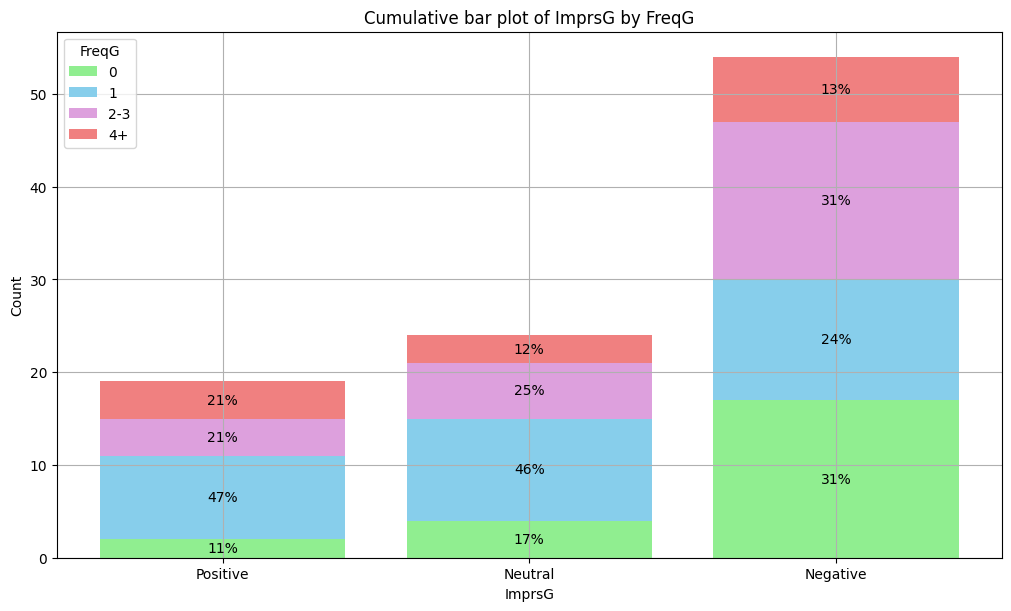

In [54]:
plot_cumulative_bar_dummy(df_ImprsG_labeled[["Positive", "Neutral", "Negative"]], df_FreqG, 
                          "ImprsG", "FreqG", 
                          ["Positive", "Neutral", "Negative"], 
                          ["0", "1", "2-3", "4+"], color4, type="vertical")

In [73]:
df_tmp = df_ImprsG_labeled.drop(columns=["Positive", "Neutral", "Negative"])

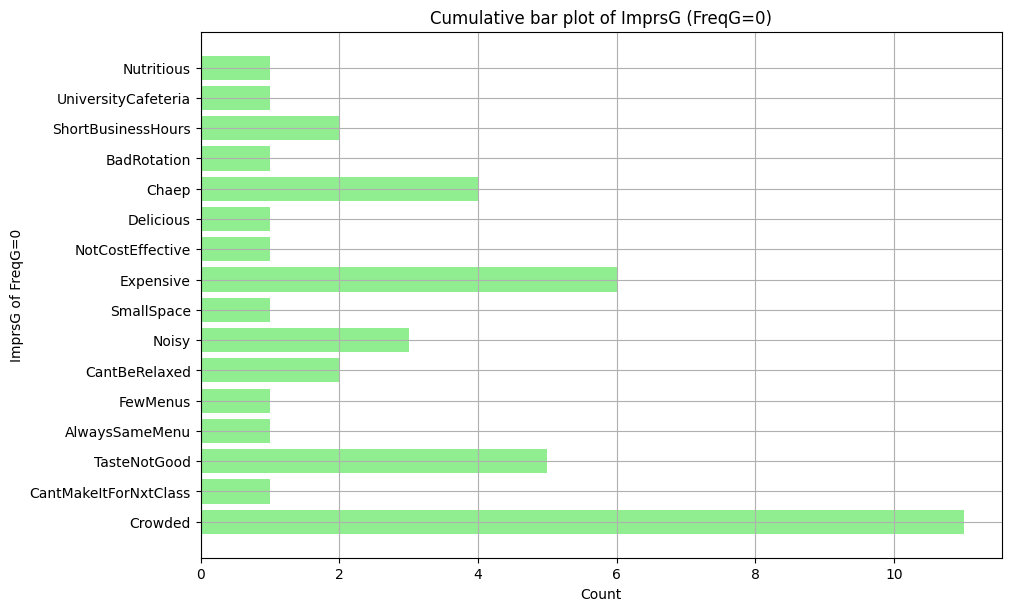

In [77]:
n = "0"

df_tmp1 = df_tmp[df_FreqG["FreqG"] == n]
df_tmp_columns = list(df_tmp1.columns)
df_tmp_counts = list(df_tmp1.sum().values)
drop_columns = [df_tmp_columns[i] for i in range(len(df_tmp_columns)) if df_tmp_counts[i] == 0]
df_tmp1 = df_tmp1.drop(columns=drop_columns)
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.barh(df_tmp1.columns, df_tmp1.sum().values, color="lightgreen")
ax.set_xlabel("Count")
ax.set_ylabel(f"ImprsG of FreqG={n}")
ax.set_title(f"Bar plot of ImprsG (FreqG={n})")
ax.grid()
fig.savefig(f"images/ImprsGByFreqG={n}.png")

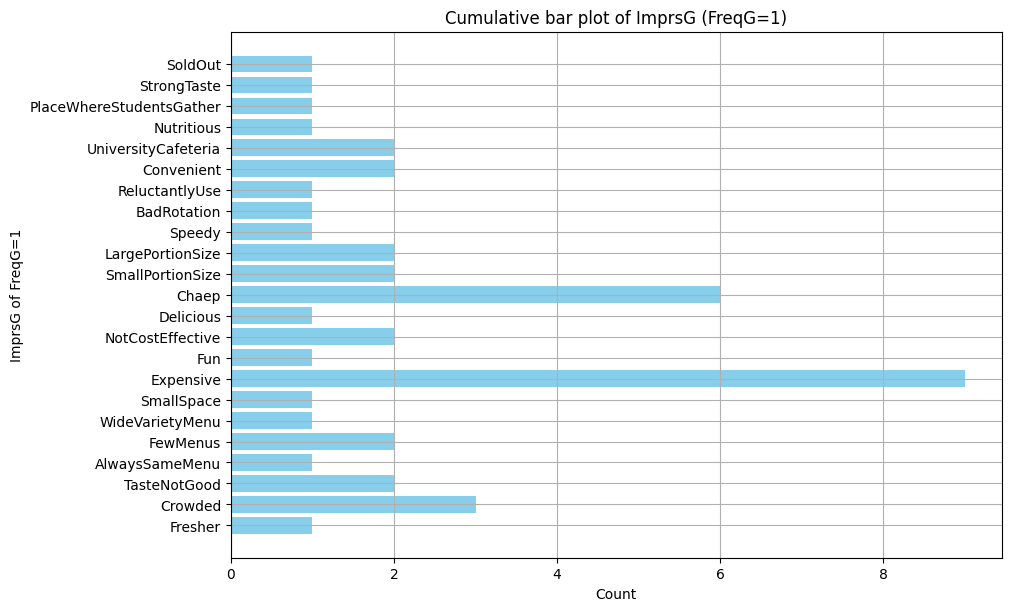

In [78]:
n = "1"

df_tmp1 = df_tmp[df_FreqG["FreqG"] == n]
df_tmp_columns = list(df_tmp1.columns)
df_tmp_counts = list(df_tmp1.sum().values)
drop_columns = [df_tmp_columns[i] for i in range(len(df_tmp_columns)) if df_tmp_counts[i] == 0]
df_tmp1 = df_tmp1.drop(columns=drop_columns)
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.barh(df_tmp1.columns, df_tmp1.sum().values, color="skyblue")
ax.set_xlabel("Count")
ax.set_ylabel(f"ImprsG of FreqG={n}")
ax.set_title(f"Bar plot of ImprsG (FreqG={n})")
ax.grid()
fig.savefig(f"images/ImprsGByFreqG={n}.png")

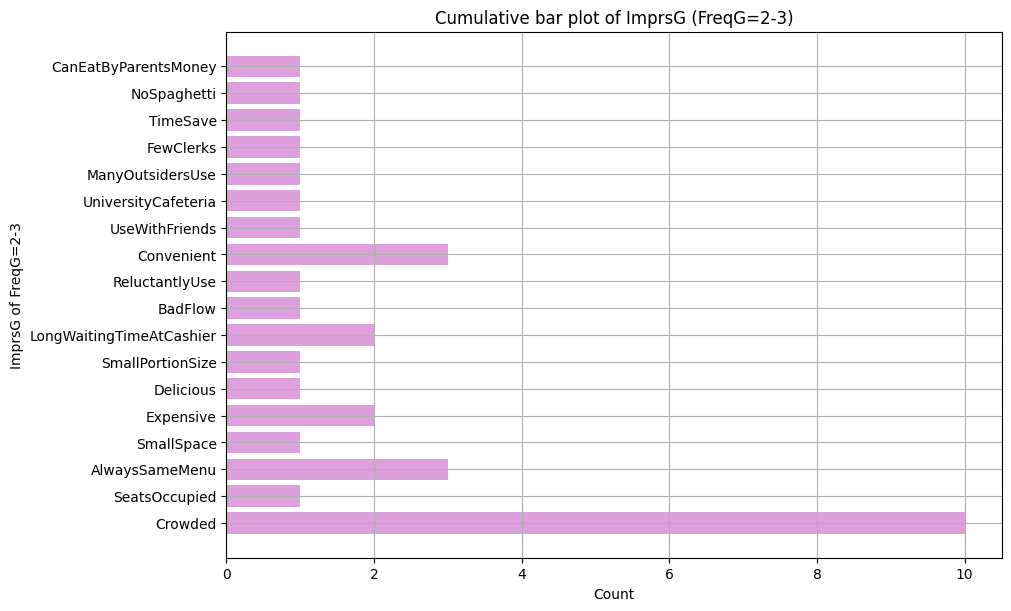

In [79]:
n = "2-3"

df_tmp1 = df_tmp[df_FreqG["FreqG"] == n]
df_tmp_columns = list(df_tmp1.columns)
df_tmp_counts = list(df_tmp1.sum().values)
drop_columns = [df_tmp_columns[i] for i in range(len(df_tmp_columns)) if df_tmp_counts[i] == 0]
df_tmp1 = df_tmp1.drop(columns=drop_columns)
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.barh(df_tmp1.columns, df_tmp1.sum().values, color="plum")
ax.set_xlabel("Count")
ax.set_ylabel(f"ImprsG of FreqG={n}")
ax.set_title(f"Bar plot of ImprsG (FreqG={n})")
ax.grid()
fig.savefig(f"images/ImprsGByFreqG={n}.png")

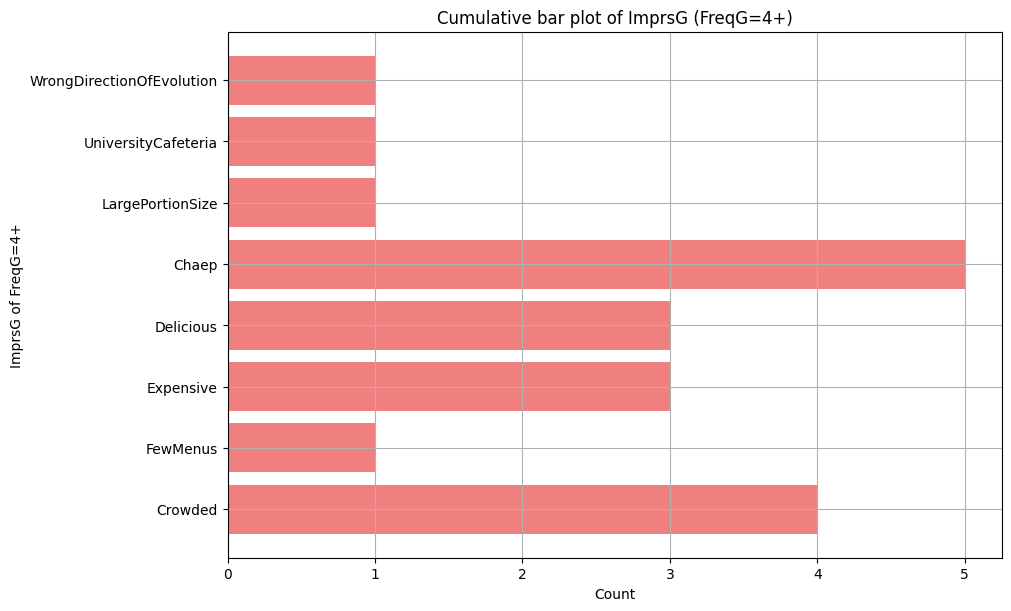

In [80]:
n = "4+"

df_tmp1 = df_tmp[df_FreqG["FreqG"] == n]
df_tmp_columns = list(df_tmp1.columns)
df_tmp_counts = list(df_tmp1.sum().values)
drop_columns = [df_tmp_columns[i] for i in range(len(df_tmp_columns)) if df_tmp_counts[i] == 0]
df_tmp1 = df_tmp1.drop(columns=drop_columns)
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.barh(df_tmp1.columns, df_tmp1.sum().values, color="lightcoral")
ax.set_xlabel("Count")
ax.set_ylabel(f"ImprsG of FreqG={n}")
ax.set_title(f"Bar plot of ImprsG (FreqG={n})")
ax.grid()
fig.savefig(f"images/ImprsGByFreqG={n}.png")